In [2]:
#listing 1-1
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import datetime
import statistics
import scipy
from scipy import stats

In [3]:
#Listing 1-2. Reading the Data into Memory
filecsv = pd.read_csv('trip.csv')


In [4]:
#Listing 1-3. Printing Size of the Dataset and Printing First Few Rows
print(len(filecsv))
filecsv.head()

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [5]:
#Listing 1-4. Determining the Time Range of the Dataset
data = filecsv.sort_values(by='starttime')
data.reset_index()
print('Date range of dataset: %s - %s' %(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


<AxesSubplot: title={'center': 'Distribution of user types '}, xlabel='usertype'>

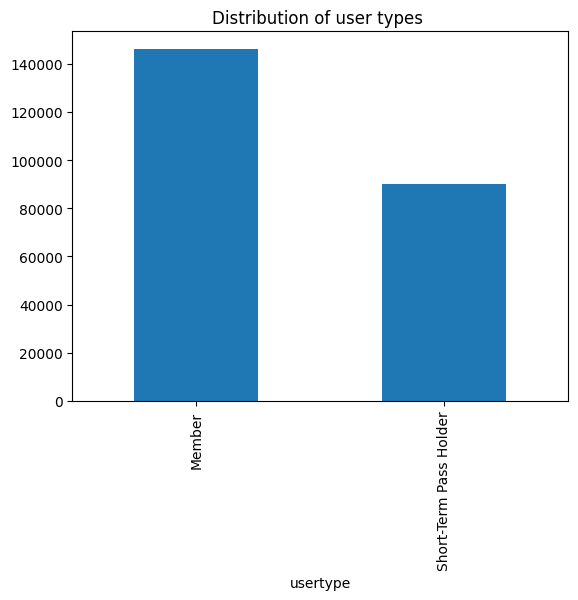

In [6]:
#Listing 1-5. Plotting the Distribution of User Types
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title='Distribution of user types ')

<AxesSubplot: title={'center': 'Distribution of Genders '}, xlabel='gender'>

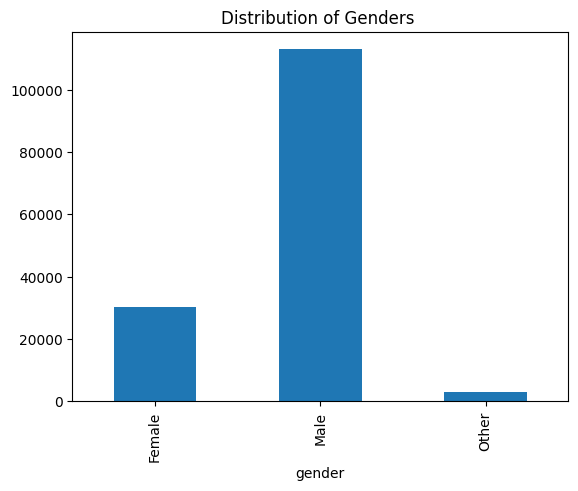

In [7]:
#Listing 1-6. Plotting the Distribution of Gender
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Distribution of Genders ')

<AxesSubplot: title={'center': 'Distribution of birth years'}, xlabel='birthyear'>

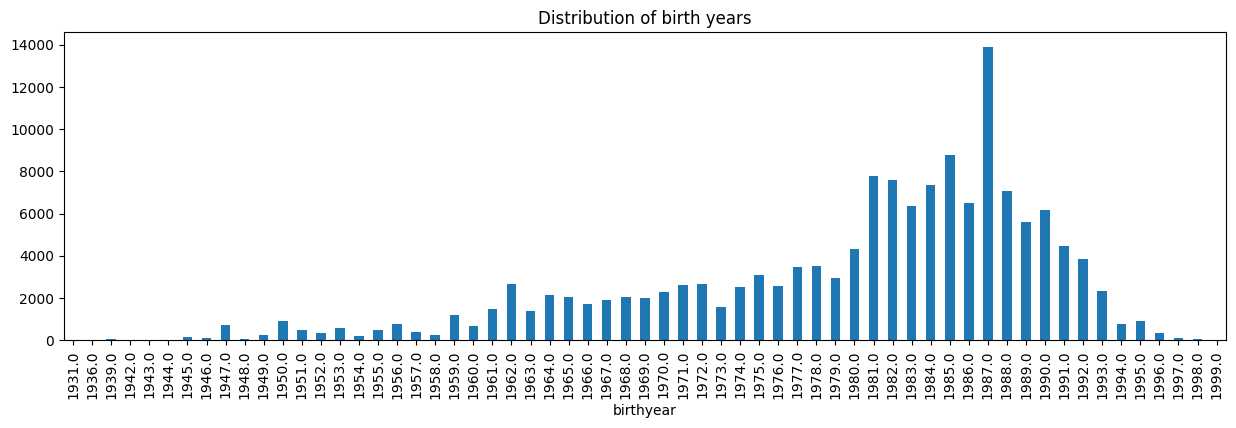

In [8]:
#Listing 1-7. Plotting the Distribution of Birth Years
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of birth years',
figsize = (15,4))

<AxesSubplot: title={'center': 'Distribution of user types'}, xlabel='usertype'>

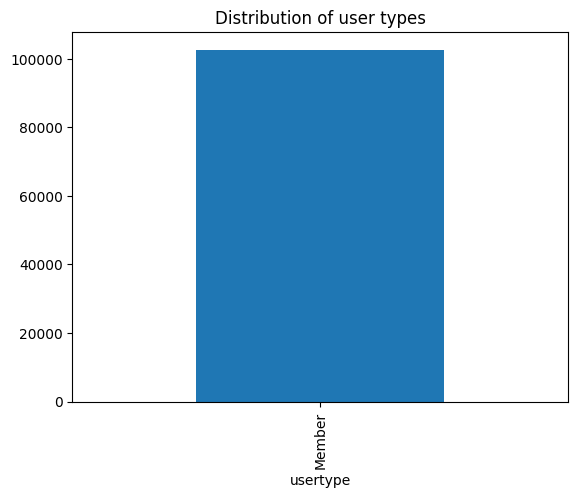

In [9]:
#Listing 1-8. Plotting the Frequency of Member Types for Millenials
data_mil = data[(data['birthyear']>=1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution of user types')

<AxesSubplot: title={'center': 'Distribution of birth years by Gender'}, xlabel='birthyear'>

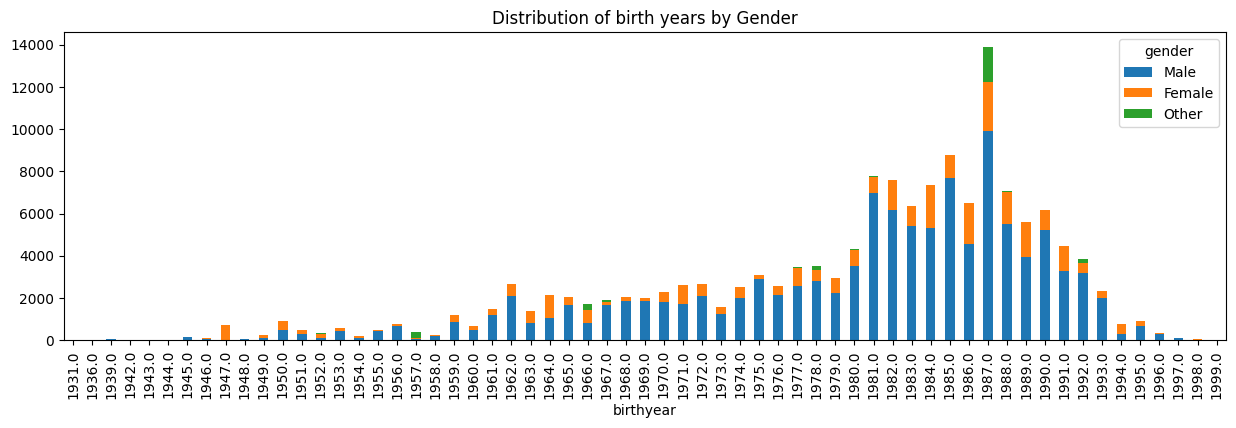

In [10]:
#Listing 1-9. Plotting the Distribution of Birth Years by Gender Type
groupby_birthyear_gender = data.groupby(['birthyear','gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title='Distribution of birth years by Gender', stacked=True,
figsize=(15,4))

<AxesSubplot: title={'center': 'Distribution of birth years by User Types'}, xlabel='birthyear'>

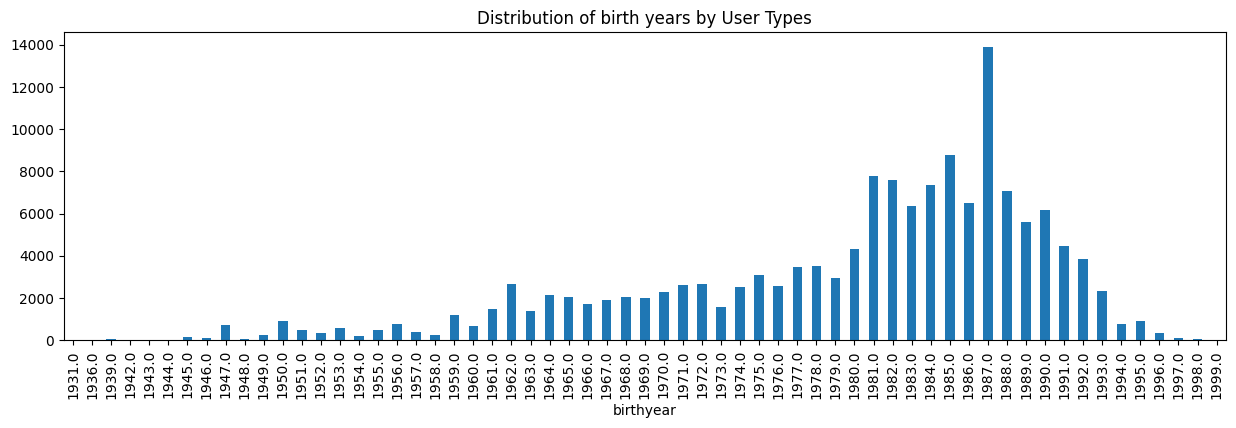

In [11]:
#Listing 1-10. Plotting the Distribution of Birth Years by User Types
groupby_birthyear_users = data.groupby(['birthyear','usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_users['Member'].plot.bar(title='Distribution of birth years by User Types', stacked=True,
figsize=(15,4))

In [12]:
#Listing 1-11. Validation If We Don’t Have Birth Year Available for Short-Term Pass
data[data['usertype'] =='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [13]:
#Listing 1-12. Validation If We Don’t Have Gender Available for Short-Term Pass Holders
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [14]:
#Listing 1-13. Converting String to datetime, and Deriving New Features
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)


<AxesSubplot: title={'center': 'Distribution of Trip duration by date'}, xlabel='starttime_date'>

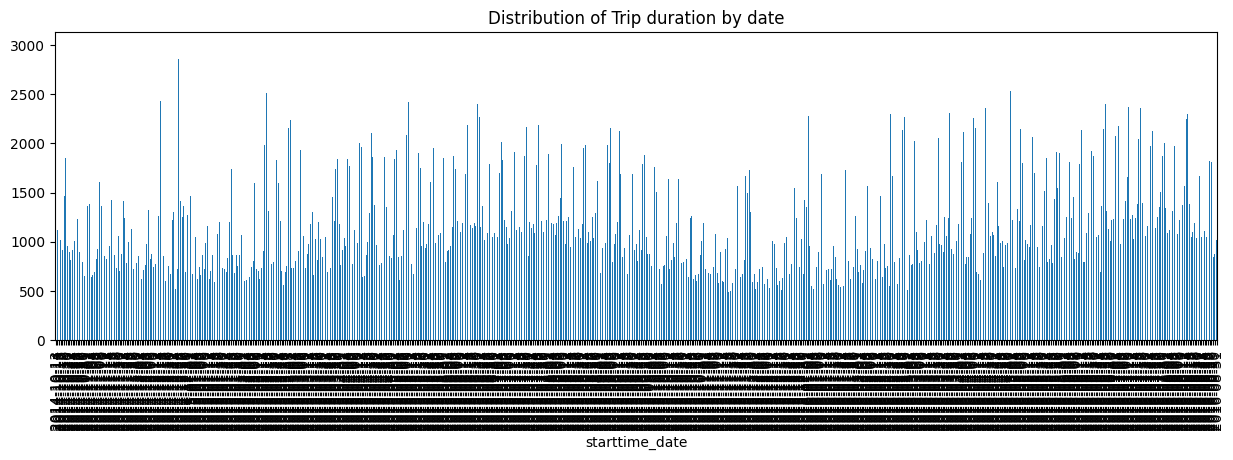

In [21]:
#Listing 1-14. Plotting the Distribution of Trip Duration over Daily Time
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title =
'Distribution of Trip duration by date', figsize = (15,4))